<a href="https://colab.research.google.com/github/Maiven/Machine_learning_practice/blob/main/mlproject2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [7]:
print(train.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train.head()
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train.info()
print(' ')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [10]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Heikkinen, Miss. Laina",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
#Analyse Further Through Pivoting Features

train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Pclass', ascending=True)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
#Aside from getting the average, we can also find out how many total passengers and how many actually survived from each class by using sum or count function.
train[["Sex", "Survived"]].groupby(['Sex']).mean()


,Survived
Sex,
female,0.742038
male,0.188908


Now we can see the data with only male and female data, where female has much much higher survival rate with 74.2% compared to 18.89% from male category.


Now, let’s pivot the features for the survival rate of people that take their children along:

In [14]:
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


This data is rather confusing because regardless of the number of parents or children involved, the survival rate seems unaffected. However, we should try out on the data for people who bring along spouse or siblings below:

In [15]:
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Similar to the parents / children data, the spouse / siblings data seems does not affect the survival rate. Therefore, we can conclude that both the number of sibling / spouse and parent/ children they bring along does not correlated with the survival rate.


Data Visualisation


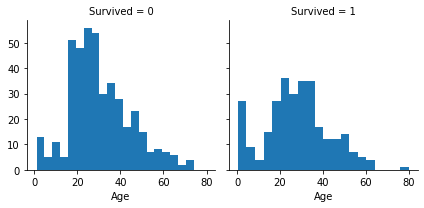

In [16]:
ages = sns.FacetGrid(train, col='Survived')
ages.map(plt.hist, 'Age', bins=20)

Combined Data Visualisation


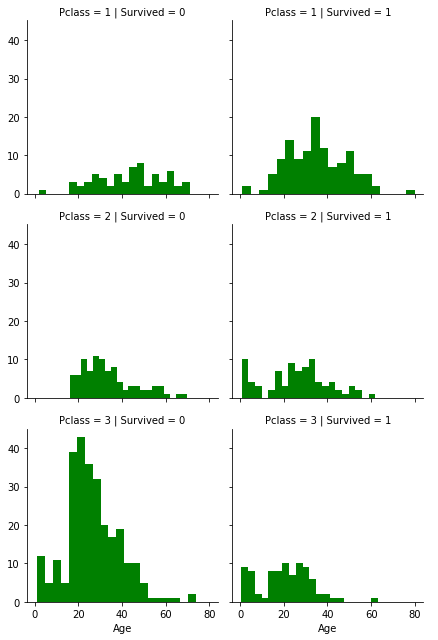

In [17]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', color='green', bins=20)
grid.add_legend();

Now we can compare between gender, embark, and class by using seaborn’s pointplot below:

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


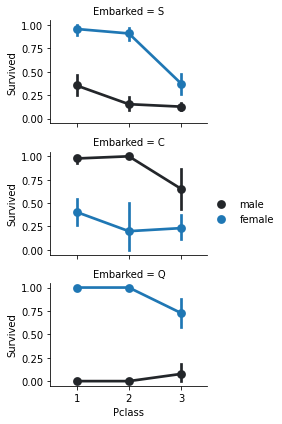

In [18]:
grid = sns.FacetGrid(train, row='Embarked', height=2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

Next, how about the correlation between fare price to other features, such as embarked and gender features?

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


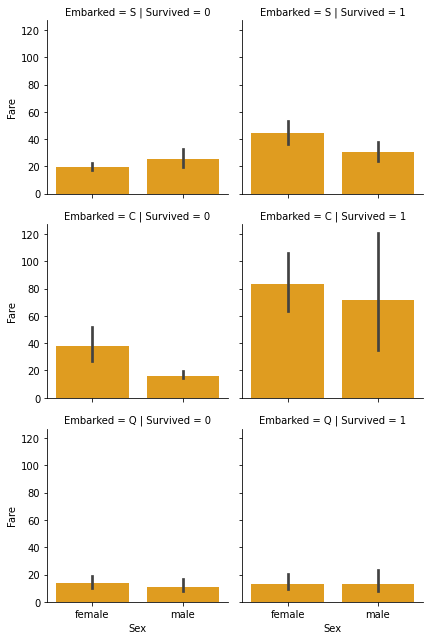

In [19]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare', color='orange')
grid.add_legend()

Data Wrangling


The first step in data wrangling is to drop the most feature with many missing value and does not have any correlation to survival, such as ticket and cabin feature, which can be done similarly as the previous article’s method:


In [20]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [21]:
merge = [train, test]

Creating New Feature


In [24]:
for dataset in merge:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Data Cleaning


There are certain titles that are mostly survived and some are not, therefore, we need to modify and combine the titles with low frequency as follows:

In [25]:
for dataset in merge:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Distinct')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

from merge, dataset, we are focusing on the newly created title feature and replace them into titles that are more common and modify several unique titles into “Distinct” title.


Now, we can analyse the data better by pivoting the feature as earlier:


In [26]:
train[['Title', 'Survived']].groupby(['Title']).mean().sort_values(by='Survived', ascending=False)


,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Distinct,0.347826
Mr,0.156673


With small size of data category in title, we can modify the title data into ordinal data, for example Mr as 1, Miss as 2, etc. as follows:


In [28]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Distinct": 5}
for dataset in merge:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)


fillna function is used to change the empty cell into a given value, where in this case, it is 0. Let’s print out the result:


In [29]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


We can see that the title has been modified into ordinal data in the far right column. This means that we are no longer need the name feature and it is wiser to drop any feature that is not correlated to the survival to reduce processing time during training section.


In [30]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
merge = [train, test]


Convert Categorical Data into Ordinal Data


Since Machine Learning can only process numerical data, it is also important for us to modify other categorical data into ordinal data, which in this case is the Sex feature, to modify female as 1 and male as 0:


In [31]:
for dataset in merge:
  dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Another categorical data that need to be converted into ordinal data is from the embarked feature where the data consists of S, C, and Q. Based on the .info() analysis, there are 3 missing data, which can be replaced by searching for the most common data by using mode() function:


In [34]:
freq_port = train.Embarked.dropna().mode()[0]


In [37]:
for dataset in merge:
  dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [39]:
for dataset in merge:
  dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


Estimating Empty Values


Fill Missing Values of Age Feature and Modify the Data into Ordinal Data


Firstly, we need to fill the missing values from the age features using the above method as shown in the code and formula below:


In [43]:
for dataset in merge:
  age_avg = dataset['Age'].mean()
  age_std = dataset['Age'].std()
  age_null_count = dataset['Age'].isnull().sum()
  age_null_random_value = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_value
  dataset['Age'] = dataset['Age'].astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
train['AgeBand'] = pd.cut(train['Age'], 5)


In [46]:
for dataset in merge:
  dataset.loc[ dataset['Age'] <= 16, 'Age']                  = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;


In [47]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.0, 48.0]"
5,0,3,0,2,0,0,8.4583,2,1,"(32.0, 48.0]"
6,0,1,0,3,0,0,51.8625,0,1,"(48.0, 64.0]"
7,0,3,0,0,3,1,21.0750,0,4,"(-0.08, 16.0]"
8,1,3,1,1,0,2,11.1333,0,3,"(16.0, 32.0]"
9,1,2,1,0,1,0,30.0708,1,3,"(-0.08, 16.0]"


Since we do not need the AgeBand feature any longer, we can drop it.


In [48]:
train = train.drop(['AgeBand'], axis=1)
merge = [train, test]


Create New Feature by Combining the Existing Features


In [49]:
for dataset in merge:
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)


,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [51]:
for dataset in merge:
  dataset['IsAlone'] = 0
  dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()


,Survived
IsAlone,
0,0.505650
1,0.303538


In [52]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
merge = [train, test]


Create New Feature by Multiplying the Existing Features Data


In [53]:
for dataset in merge:
  dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,6,2,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Continuous Data Conversion Into Ordinal Data for Fare Feature


As we learned from the info() function’s results, Fare feature in test dataset is missing several data. Therefore, we can replace them with the median value as follows:


In [54]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)


In [55]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand']).mean().sort_values(by='FareBand', ascending=True)


,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [56]:
for dataset in merge:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
merge = [train, test]


Final Output of Data Cleaning and Data Wrangling


In [57]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,2,1,2,1,1,6
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [58]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


Data and Label


In [59]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()


Prediction Using Regression Models


There are many algorithms that can be used for both regression / prediction project and also classification project. In this case, we are going to use algorithms that are suitable for both case, which are:

  Logistic Regression
  
  Gaussian Naive Bayes
  
  Support Vector Machines
  
  k-Nearest Neighbors
  
  Random Forrest
  
  Artificial neural network


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier


Logistic Regression


In [61]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log


80.81

Naive Bayes Classifier


In [62]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.32

Support Vector Machine (SVM)


In [63]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.38

K-Nearest Neighbour (KNN)


In [64]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.08

Perceptron


In [66]:
pip install perceptron

  Created wheel for perceptron: filename=perceptron-1.1.0-cp36-none-any.whl size=7584 sha256=f76019709f3a469b91e8f7ce9b43cf82bb36e57304c3ec9ce9cf0419d425d69c
  Stored in directory: /root/.cache/pip/wheels/a9/58/78/2cdc132ced713a00dc133507dc982e62cc0c771227187916f3
Successfully built perceptron


In [69]:
from sklearn.linear_model import Perceptron

In [70]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

68.01

Random Forest


In [71]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.21

From these results, we can rank the performance of each algorithm based on their accuracy:

In [72]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.21
1,KNN,86.08
0,Support Vector Machines,82.38
2,Logistic Regression,80.81
4,Naive Bayes,76.32
5,Perceptron,68.01


As we can see random forest has the highest score, therefore, we will be using random forest prediction as in Y_predict function to print out the result:

In [73]:
pd.set_option('display.max_rows', 500)
output = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
print(output)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         1
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         1
29           921         0
30           922         0
31           923         0
32           924         0
33           925         0
34           926         0
35           927         0
3